In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/dl_dataset.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


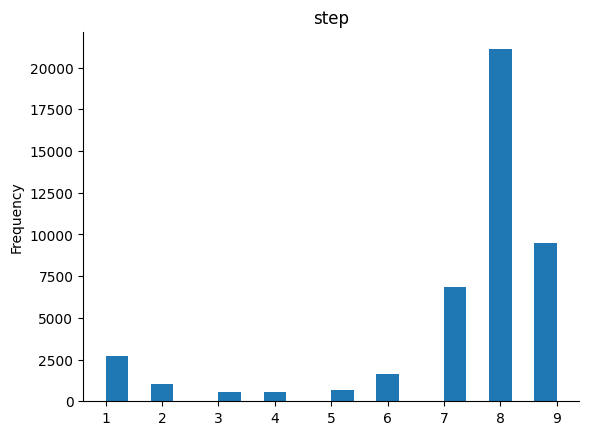

In [ ]:
# @title step

from matplotlib import pyplot as plt
df['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.shape

(44599, 11)

In [ ]:
df.type.value_counts()

,count
type,
PAYMENT,19955
CASH_OUT,11681
CASH_IN,8159
TRANSFER,4201
DEBIT,603


In [ ]:
type=df['type'].value_counts()


In [ ]:
transactions=type.index

In [ ]:
quantity=type.values

In [ ]:
import plotly.express as px
px.pie(df,values=quantity,names=transactions,hole=0.4,title="Distribution of Transaction Type")


In [ ]:
df=df.dropna()

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44593,9,PAYMENT,6641.86,C12929038,674.48,0.00,M56908376,0.00,0.00,0.0,0.0
44594,9,PAYMENT,209.33,C2144090070,82378.00,82168.67,M734926227,0.00,0.00,0.0,0.0
44595,9,CASH_OUT,145427.71,C31567324,383752.00,238324.29,C608767708,645.00,146072.71,0.0,0.0
44596,9,CASH_OUT,180102.94,C553029922,2177.00,0.00,C834079530,60522.10,240625.04,0.0,0.0


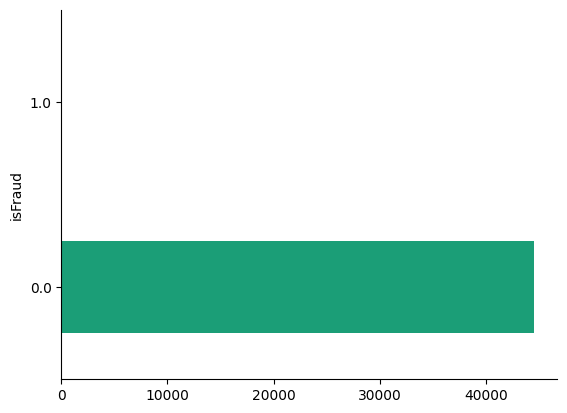

In [ ]:
# @title isFraud

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('isFraud').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44593,9,PAYMENT,6641.86,C12929038,674.48,0.00,M56908376,0.00,0.00,No Fraud,0.0
44594,9,PAYMENT,209.33,C2144090070,82378.00,82168.67,M734926227,0.00,0.00,No Fraud,0.0
44595,9,CASH_OUT,145427.71,C31567324,383752.00,238324.29,C608767708,645.00,146072.71,No Fraud,0.0
44596,9,CASH_OUT,180102.94,C553029922,2177.00,0.00,C834079530,60522.10,240625.04,No Fraud,0.0


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df['type'].value_counts()

,count
type,
PAYMENT,19954
CASH_OUT,11681
CASH_IN,8159
TRANSFER,4201
DEBIT,603


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44593,9,PAYMENT,6641.86,C12929038,674.48,0.00,M56908376,0.00,0.00,No Fraud,0.0
44594,9,PAYMENT,209.33,C2144090070,82378.00,82168.67,M734926227,0.00,0.00,No Fraud,0.0
44595,9,CASH_OUT,145427.71,C31567324,383752.00,238324.29,C608767708,645.00,146072.71,No Fraud,0.0
44596,9,CASH_OUT,180102.94,C553029922,2177.00,0.00,C834079530,60522.10,240625.04,No Fraud,0.0


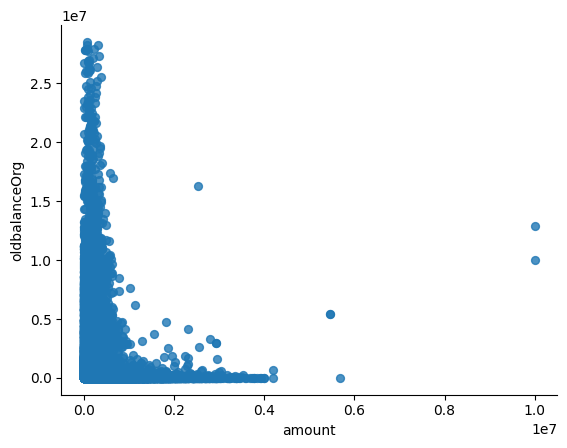

In [ ]:
# @title amount vs oldbalanceOrg

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='amount', y='oldbalanceOrg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['type']=df['type'].map({'PAYMENT':1, 'TRANSFER':4, 'CASH_OUT':2, 'DEBIT':5, 'CASH_IN':3})


In [ ]:
df['type'].value_counts()

,count
type,
1,19954
2,11681
3,8159
4,4201
5,603


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0.0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0.0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0.0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0.0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44593,9,1,6641.86,C12929038,674.48,0.00,M56908376,0.00,0.00,No Fraud,0.0
44594,9,1,209.33,C2144090070,82378.00,82168.67,M734926227,0.00,0.00,No Fraud,0.0
44595,9,2,145427.71,C31567324,383752.00,238324.29,C608767708,645.00,146072.71,No Fraud,0.0
44596,9,2,180102.94,C553029922,2177.00,0.00,C834079530,60522.10,240625.04,No Fraud,0.0


In [ ]:
df['type'].unique()

array([1, 4, 2, 5, 3])

In [ ]:
df['type'].value_counts()

,count
type,
1,19954
2,11681
3,8159
4,4201
5,603


In [ ]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]


In [ ]:
y=df.iloc[:,-2]

In [ ]:
y

,isFraud
0,No Fraud
1,No Fraud
2,Fraud
3,Fraud
4,No Fraud
...,...
44593,No Fraud
44594,No Fraud
44595,No Fraud
44596,No Fraud


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold


In [ ]:
models=[]
results=[]
names=[]

In [ ]:
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))





In [ ]:
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier())]

In [ ]:
from sklearn import model_selection
for name,model in models:
  kfold=model_selection.KFold(n_splits=6,random_state=7,shuffle=True)
  cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

LR: 0.997960 (0.000623)
KNN: 0.997937 (0.000644)
CART: 0.998027 (0.000401)


In [ ]:
!pip install tensorflow # install tensorflow if it is not already installed
import tensorflow as tf # imports the tensorflow module and assigns it to the variable tf

#initialize the ANN model
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,activation='relu')) #First layer
ann.add(tf.keras.layers.Dense(units=10, activation='relu')) #second layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #output layer

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Convert xtrain to numeric types
xtrain = xtrain.astype(float)

# Convert ytrain to numeric types (assuming 'No Fraud' should be 0 and 'Fraud' should be 1)
ytrain = ytrain.map({'No Fraud': 0, 'Fraud': 1}).astype(float)

ann.fit(xtrain,ytrain,batch_size=32,epochs=6)

Epoch 1/6
1115/1115 [==============================] - 3s 2ms/step - loss: 2322.5352 - accuracy: 0.9454
Epoch 2/6
1115/1115 [==============================] - 2s 2ms/step - loss: 42.2533 - accuracy: 0.9917
Epoch 3/6
1115/1115 [==============================] - 2s 2ms/step - loss: 39.0330 - accuracy: 0.9891
Epoch 4/6
1115/1115 [==============================] - 2s 2ms/step - loss: 37.3800 - accuracy: 0.9892
Epoch 5/6
1115/1115 [==============================] - 2s 2ms/step - loss: 50.3184 - accuracy: 0.9909
Epoch 6/6
1115/1115 [==============================] - 2s 2ms/step - loss: 49.8040 - accuracy: 0.9894
